# Project 2: Cat Faces and Clothing Reviews

Harrison Blondeau, John Moroney, Mitch Rimerman

## Cat Faces

### Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from io import BytesIO
from zipfile import ZipFile
from time import time
import sklearn
from skimage import io
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib.image import imread
import glob

import warnings

warnings.filterwarnings('ignore')

Get the cat-faces dataset from: https://github.com/fferlito/Cat-faces-dataset

Load all the images in the first zip file. Use scikit-image (https://scikit-image.org/) to load the images and convert them to grayscale (rgb2gray).

In [2]:
!tar -xvf "/content/dataset-part1.tar" -C "/content/output_folder" 

Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_5049.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_1411.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_2397.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_2223.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_2892.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_7455.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_1741.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_9189.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_7802.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_5493.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflag

In [3]:
path = "/content/output_folder/dataset-part1"

# save all of the file names to a list and
# then loop through this list reading your images (numpy arrays) into a new list

print("\nRetrieving cats images from:")
print(path)

folders = glob.glob(path)
i = 0
cat_col = []

for folder in folders:
    for f in glob.glob(folder+'/*.png'):
        i = i +1
        cat_col.append(f)

print("\nCat images found: " + np.str(i))


Retrieving cats images from:
/content/output_folder/dataset-part1

Cat images found: 10000


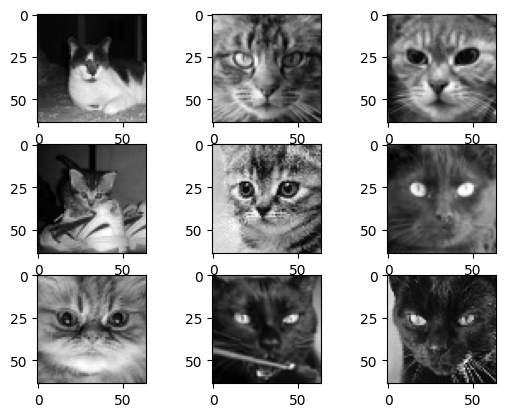

In [4]:
import cv2

fig, ax = plt.subplots(nrows=3, ncols=3)
axes = ax.flatten()


for i in range(9):
    path=cat_col[i] 
    img = cv2.imread(path)
    axes[i].imshow(rgb2gray(img), cmap=plt.cm.gray)

plt.show()   

In [5]:
img.shape

(64, 64, 3)

Adapt the code from the following website to work with the cat faces:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

The cat faces are the same size, so you should only have to set up a matrix with images in rows. Make sure you center the cat faces.by removing the mean, see the face example for details.


In [6]:
cat_col_num = []

for i in range(0,10000):
  cat_col_num.append(rgb2gray(imread(cat_col[i])))

cat_col_num = np.array(cat_col_num)
cat_resh = cat_col_num.reshape(cat_col_num.shape[0], cat_col_num.shape[1] * cat_col_num.shape[1])

cat_centered = cat_resh - cat_resh.mean(axis=0)
cat_centered -= cat_centered.mean(axis=1).reshape(cat_col_num.shape[0], -1)

In [7]:
cat_centered

array([[-0.21583831, -0.22826183, -0.2374984 , ...,  0.1556435 ,
         0.19136658,  0.17749885],
       [ 0.32803735,  0.3777934 ,  0.35566115, ..., -0.36391342,
        -0.19707423, -0.03531254],
       [-0.2486715 , -0.23087618, -0.1749351 , ..., -0.18398574,
        -0.21963249, -0.22647628],
       ...,
       [-0.12765728, -0.04285996,  0.00171916, ...,  0.26058722,
         0.25095582,  0.23876967],
       [ 0.03496362,  0.05224599,  0.04551725, ..., -0.23846556,
        -0.20632873, -0.14145254],
       [-0.09769732,  0.00752622,  0.15568808, ..., -0.09027749,
        -0.13184696, -0.15187624]], dtype=float32)

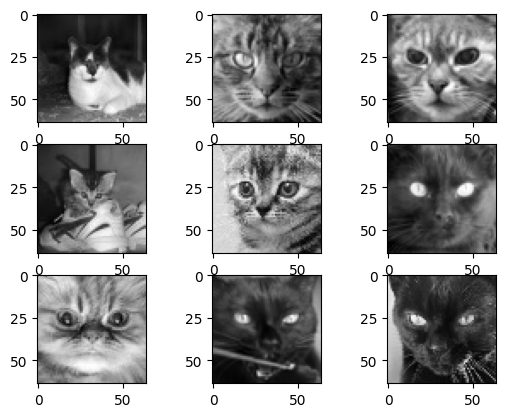

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3)
axes = ax.flatten()

for i in range(9):
  axes[i].imshow(cat_centered[i].reshape(64,64,1), cmap=plt.cm.gray)

plt.show()

### PCA Transformation

Below is the adapted code to display the eigenfaces using a randomized SVD

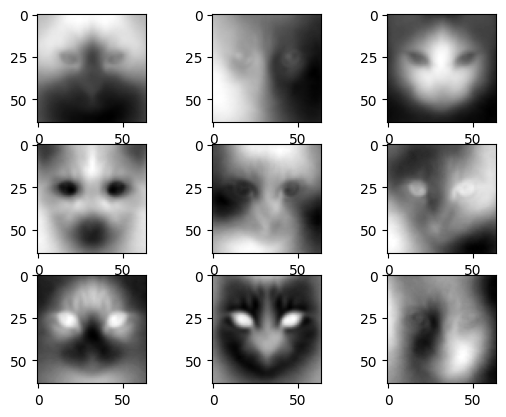

In [9]:
n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

pca_estimator = PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(cat_centered)


fig, ax = plt.subplots(nrows=3, ncols=3)
axes = ax.flatten()

for i in range(9):
  axes[i].imshow(pca_estimator.components_[i].reshape(64,64,1), cmap=plt.cm.gray)

plt.show()

Next, you will work on selecting the number of components. You may have seen a plot before using
the eigenvalues. Recreate this plot for the cat dataset: you can get them from the PCA model
object. However, you have another method to select the number of components, now that you can
use cross-validation.
Look at this example from the scikit-learn documentation to see how to
use cross-validation with PCA. Then, using the cat faces dataset, make a plot of reconstruction error for PCA using sklearn. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html

In [10]:
cv_scores = []
exp_var = []
for i in range(0, 21):
    pca = PCA(svd_solver="full", n_components=i)
    print('n_components = %d' % i)
    score = np.mean(cross_val_score(pca, cat_centered, n_jobs=-1))
    pca.fit(cat_centered)
    var_ratio = pca.explained_variance_ratio_

    cv_scores.append(score)
    exp_var.append(var_ratio)

print(cv_scores)
print(exp_var)

n_components = 0
n_components = 1
n_components = 2
n_components = 3
n_components = 4
n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10
n_components = 11
n_components = 12
n_components = 13
n_components = 14
n_components = 15
n_components = 16
n_components = 17
n_components = 18
n_components = 19
n_components = 20
[762.3503766616432, 1123.7539794921875, 1479.8665771484375, 1744.75791015625, 1880.144140625, 2000.712890625, 2126.00341796875, 2223.979736328125, 2322.5111328125, 2400.70283203125, 2486.715380859375, 2553.970068359375, 2612.181787109375, 2675.324853515625, 2735.040478515625, 2783.3677734375, 2832.24814453125, 2875.54833984375, 2919.866796875, 2961.180322265625, 2998.108740234375]
[array([], dtype=float32), array([0.16368744], dtype=float32), array([0.16368744, 0.13504285], dtype=float32), array([0.16368744, 0.13504285, 0.08627736], dtype=float32), array([0.16368744, 0.13504285, 0.08627736, 0.04049579], dtype=float32), array

In [49]:
cv_scores

[762.3503766616432,
 1123.7539794921875,
 1479.8665771484375,
 1744.75791015625,
 1880.144140625,
 2000.712890625,
 2126.00341796875,
 2223.979736328125,
 2322.5111328125,
 2400.70283203125,
 2486.715380859375,
 2553.970068359375,
 2612.181787109375,
 2675.324853515625,
 2735.040478515625,
 2783.3677734375,
 2832.24814453125,
 2875.54833984375,
 2919.866796875,
 2961.180322265625,
 2998.108740234375]

In [20]:
exp_var[0] = [np.nan]
exp_var_last = [item[-1] for item in exp_var]
exp_var_last

[nan,
 0.16368744,
 0.13504285,
 0.08627736,
 0.040495787,
 0.034499425,
 0.032566838,
 0.024739465,
 0.02351842,
 0.018603992,
 0.018422246,
 0.014447411,
 0.012583419,
 0.012333856,
 0.011550244,
 0.0094677275,
 0.009139563,
 0.008097302,
 0.007864121,
 0.0072957342,
 0.006568555]

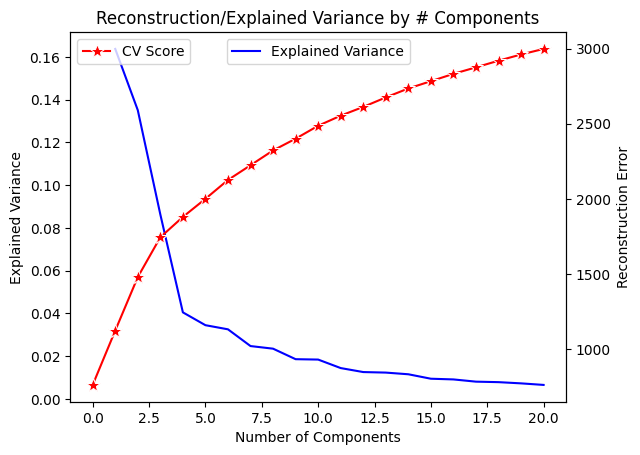

In [68]:
rec_error = pd.DataFrame({'n_components': list(range(0,21)),
                          'reconst error': cv_scores,
                          'explained var ratio': exp_var_last})


fig, ax1 = plt.subplots()
sns.lineplot(data = rec_error, x = 'n_components', y = 'explained var ratio',
             ax = ax1,color = 'blue')

# Use twin Axes here: 
ax2 = ax1.twinx()
sns.lineplot(data = rec_error, x = 'n_components', y = 'reconst error',
             ax = ax2,color = 'red', marker = '*',markersize = 10)

plt.title('Reconstruction/Explained Variance by # Components')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance')
ax2.set_ylabel('Reconstruction Error')
ax1.legend(["Explained Variance"], loc="upper center")
ax2.legend(["CV Score"], loc="upper left")
plt.show()

## Clothing Reviews and Unsupervised Learning

### Data Import and Preprocessing

Load the JSON data from modcloth located in your assignment prompt. Use OrdinalEncoder to transform the categorical data to numerical values. Combine the categorical and numerical data into a single data frame. 


In [21]:
modcloth = pd.read_json('/content/modcloth_final_data.json', lines=True)
modcloth

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


Save quality and reveiw text for graphs and text analysis later on and drop other unnecessary columns.

In [22]:
quality = modcloth['quality']
review_text = modcloth['review_text']
modcloth = modcloth.drop(["item_id","quality","user_name","fit","user_id","review_summary","review_text"], axis=1)
modcloth.count()

waist          2882
size          82790
cup size      76535
hips          56064
bra size      76772
category      82790
bust          11854
height        81683
length        82755
shoe size     27915
shoe width    18607
dtype: int64

In [23]:
modcloth

,waist,size,cup size,hips,bra size,category,bust,height,length,shoe size,shoe width
0,29.0,7,d,38.0,34.0,new,36,5ft 6in,just right,NaN,NaN
1,31.0,13,b,30.0,36.0,new,NaN,5ft 2in,just right,NaN,NaN
2,30.0,7,b,NaN,32.0,new,NaN,5ft 7in,slightly long,9.0,NaN
3,NaN,21,dd/e,NaN,NaN,new,NaN,NaN,just right,NaN,NaN
4,NaN,18,b,NaN,36.0,new,NaN,5ft 2in,slightly long,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,8,b,NaN,36.0,outerwear,NaN,5ft 8in,just right,8.5,average
82786,NaN,12,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,slightly long,NaN,NaN
82787,NaN,12,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,just right,NaN,NaN
82788,NaN,12,NaN,NaN,NaN,outerwear,NaN,5ft 3in,just right,NaN,NaN


Ordinally encode all categorical variables.

In [24]:
mod_noms = modcloth[['cup size','category','length','shoe width']]
ord_enc = OrdinalEncoder()
ord_df = pd.DataFrame(ord_enc.fit_transform(mod_noms), columns=['cup size','category','length','shoe width'])

ord_df

,cup size,category,length,shoe width
0,4.0,2.0,0.0,NaN
1,2.0,2.0,0.0,NaN
2,2.0,2.0,1.0,NaN
3,5.0,2.0,0.0,NaN
4,2.0,2.0,1.0,NaN
...,...,...,...,...
82785,2.0,3.0,0.0,0.0
82786,6.0,3.0,1.0,NaN
82787,7.0,3.0,0.0,NaN
82788,NaN,3.0,0.0,NaN


Convert height and bust to numeric variables.

In [25]:
def height(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '')
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    return h_inch
  else:
    return np.NaN


In [26]:
modcloth["height"] = modcloth["height"].astype(str).apply(height)
modcloth["bust"] = modcloth["bust"].apply(lambda x: float(x) if x != '37-39' else 38.0)

Combine Numeric and Categorical data frames.

In [27]:
mod_numeric = modcloth.drop(['cup size','category','length','shoe width'], axis=1)
frames = [mod_numeric, ord_df]
modcloth_combined = pd.concat(frames, axis=1)

In [28]:
X = modcloth_combined
X

,waist,size,hips,bra size,bust,height,shoe size,cup size,category,length,shoe width
0,29.0,7,38.0,34.0,36.0,66.0,NaN,4.0,2.0,0.0,NaN
1,31.0,13,30.0,36.0,NaN,62.0,NaN,2.0,2.0,0.0,NaN
2,30.0,7,NaN,32.0,NaN,67.0,9.0,2.0,2.0,1.0,NaN
3,NaN,21,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,NaN
4,NaN,18,NaN,36.0,NaN,62.0,NaN,2.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,8,NaN,36.0,NaN,68.0,8.5,2.0,3.0,0.0,0.0
82786,NaN,12,NaN,34.0,NaN,65.0,NaN,6.0,3.0,1.0,NaN
82787,NaN,12,36.0,32.0,NaN,64.0,NaN,7.0,3.0,0.0,NaN
82788,NaN,12,NaN,NaN,NaN,63.0,NaN,NaN,3.0,0.0,NaN


### PCA Transformation

Unfortunately, there is a lot of missing data, which prevents us from directly performing PCA on these data. Instead, you can use the statsmodels package, which has an implementation of PCA that can handle missing data.

Install the statsmodels package here: https://www.statsmodels.org/stable/install.html, and use their PCA function:

pc = PCA(X, ncomp=2, method='nipals' ,missing='fill-em')


In [29]:
from statsmodels.multivariate.pca import PCA

In [30]:
pc = PCA(X, ncomp=2, method='nipals' ,missing='fill-em')

Use seaborn’s scatterplot to plot the first two principal components. Check the statsmodels documentation for information on how to access the principal components from the pc object.

You can use scatterplot with hue=labels to color code the plot by label.

In [31]:
pc.factors

,comp_0,comp_1
0,-0.001565,0.000327
1,-0.002351,-0.002849
2,-0.002653,0.004138
3,0.003271,-0.004078
4,-0.000379,-0.001876
...,...,...
82785,-0.001758,0.003503
82786,0.000300,-0.001104
82787,-0.000995,-0.003834
82788,-0.000201,-0.003217


In [32]:
frames2 = [pc.factors, quality]
plotting_data = pd.concat(frames2, axis=1)

Text(0, 0.5, 'Component 0')

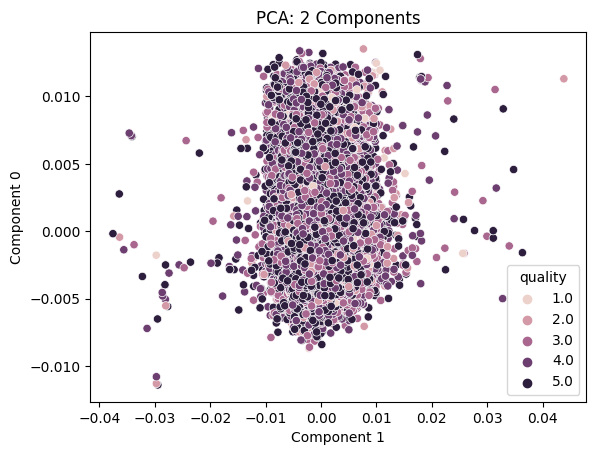

In [33]:
fig, ax = plt.subplots()
ax = sns.scatterplot(plotting_data, y="comp_0", x="comp_1", hue="quality", ax=ax)
ax.set_title("PCA: 2 Components")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 0")

Repeat the above exercise, but now include labels in the features you use to fit the PCA. This time, you can observe label information in the resulting plot.

In [34]:
X_new = pd.concat([X,quality], axis=1)
X_new

,waist,size,hips,bra size,bust,height,shoe size,cup size,category,length,shoe width,quality
0,29.0,7,38.0,34.0,36.0,66.0,NaN,4.0,2.0,0.0,NaN,5.0
1,31.0,13,30.0,36.0,NaN,62.0,NaN,2.0,2.0,0.0,NaN,3.0
2,30.0,7,NaN,32.0,NaN,67.0,9.0,2.0,2.0,1.0,NaN,2.0
3,NaN,21,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,NaN,5.0
4,NaN,18,NaN,36.0,NaN,62.0,NaN,2.0,2.0,1.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,8,NaN,36.0,NaN,68.0,8.5,2.0,3.0,0.0,0.0,4.0
82786,NaN,12,NaN,34.0,NaN,65.0,NaN,6.0,3.0,1.0,NaN,5.0
82787,NaN,12,36.0,32.0,NaN,64.0,NaN,7.0,3.0,0.0,NaN,5.0
82788,NaN,12,NaN,NaN,NaN,63.0,NaN,NaN,3.0,0.0,NaN,4.0


In [35]:
pc2 = PCA(X_new, ncomp=2, method='nipals', missing='fill-em')

Text(0, 0.5, 'Component 0')

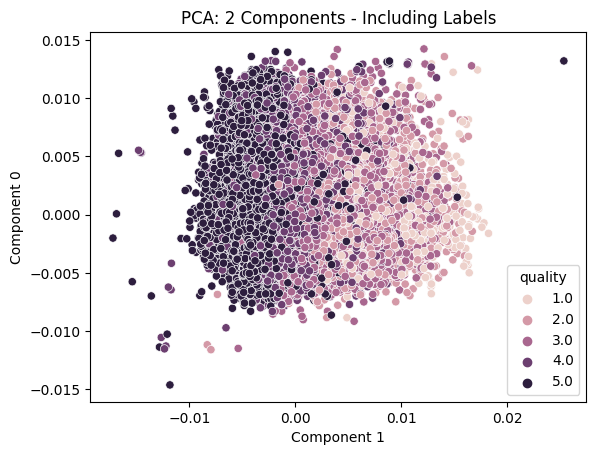

In [36]:
plotting_data_2 = pd.concat([pc2.factors, quality], axis=1)

fig, ax = plt.subplots()
ax = sns.scatterplot(plotting_data_2, y="comp_0", x="comp_1", hue="quality", ax=ax)
ax.set_title("PCA: 2 Components - Including Labels")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 0")

### Topic Modeling

Adapt the code in the Latent Dirichlet Allocation example in scikit-learn to work with the text of the clothing reviews: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py. 


Fit a model with 10 components (topics) to the reviews. Use the plotting function to visualize the top words in each topic.


In [37]:
review_text = review_text.dropna()
review_text

6725     I liked the color, the silhouette, and the fab...
6726     From the other reviews it seems like this dres...
6727     I love the design and fit of this dress!  I wo...
6728     I bought this dress for work  it is flattering...
6729     This is a very professional look. It is Great ...
                               ...                        
82785                                         Cute jacket!
82786    It's a beautiful jacket. I love how it's knit ...
82787    I love this blazer. It is a great office piece...
82788    I love this blazer!! I wore it yesterday and g...
82789         I love this piece. I'm really happy with it!
Name: review_text, Length: 76065, dtype: object

In [38]:
review_text.describe()

count        76065
unique       73313
top       Love it!
freq           153
Name: review_text, dtype: object

Vectorizing and applying LDA.

In [39]:
n_features = 1000
n_components = 10
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words="english")

tf = vectorizer.fit_transform(review_text)
feat_names = vectorizer.get_feature_names_out()

In [40]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

Defining the plotting function.

In [41]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

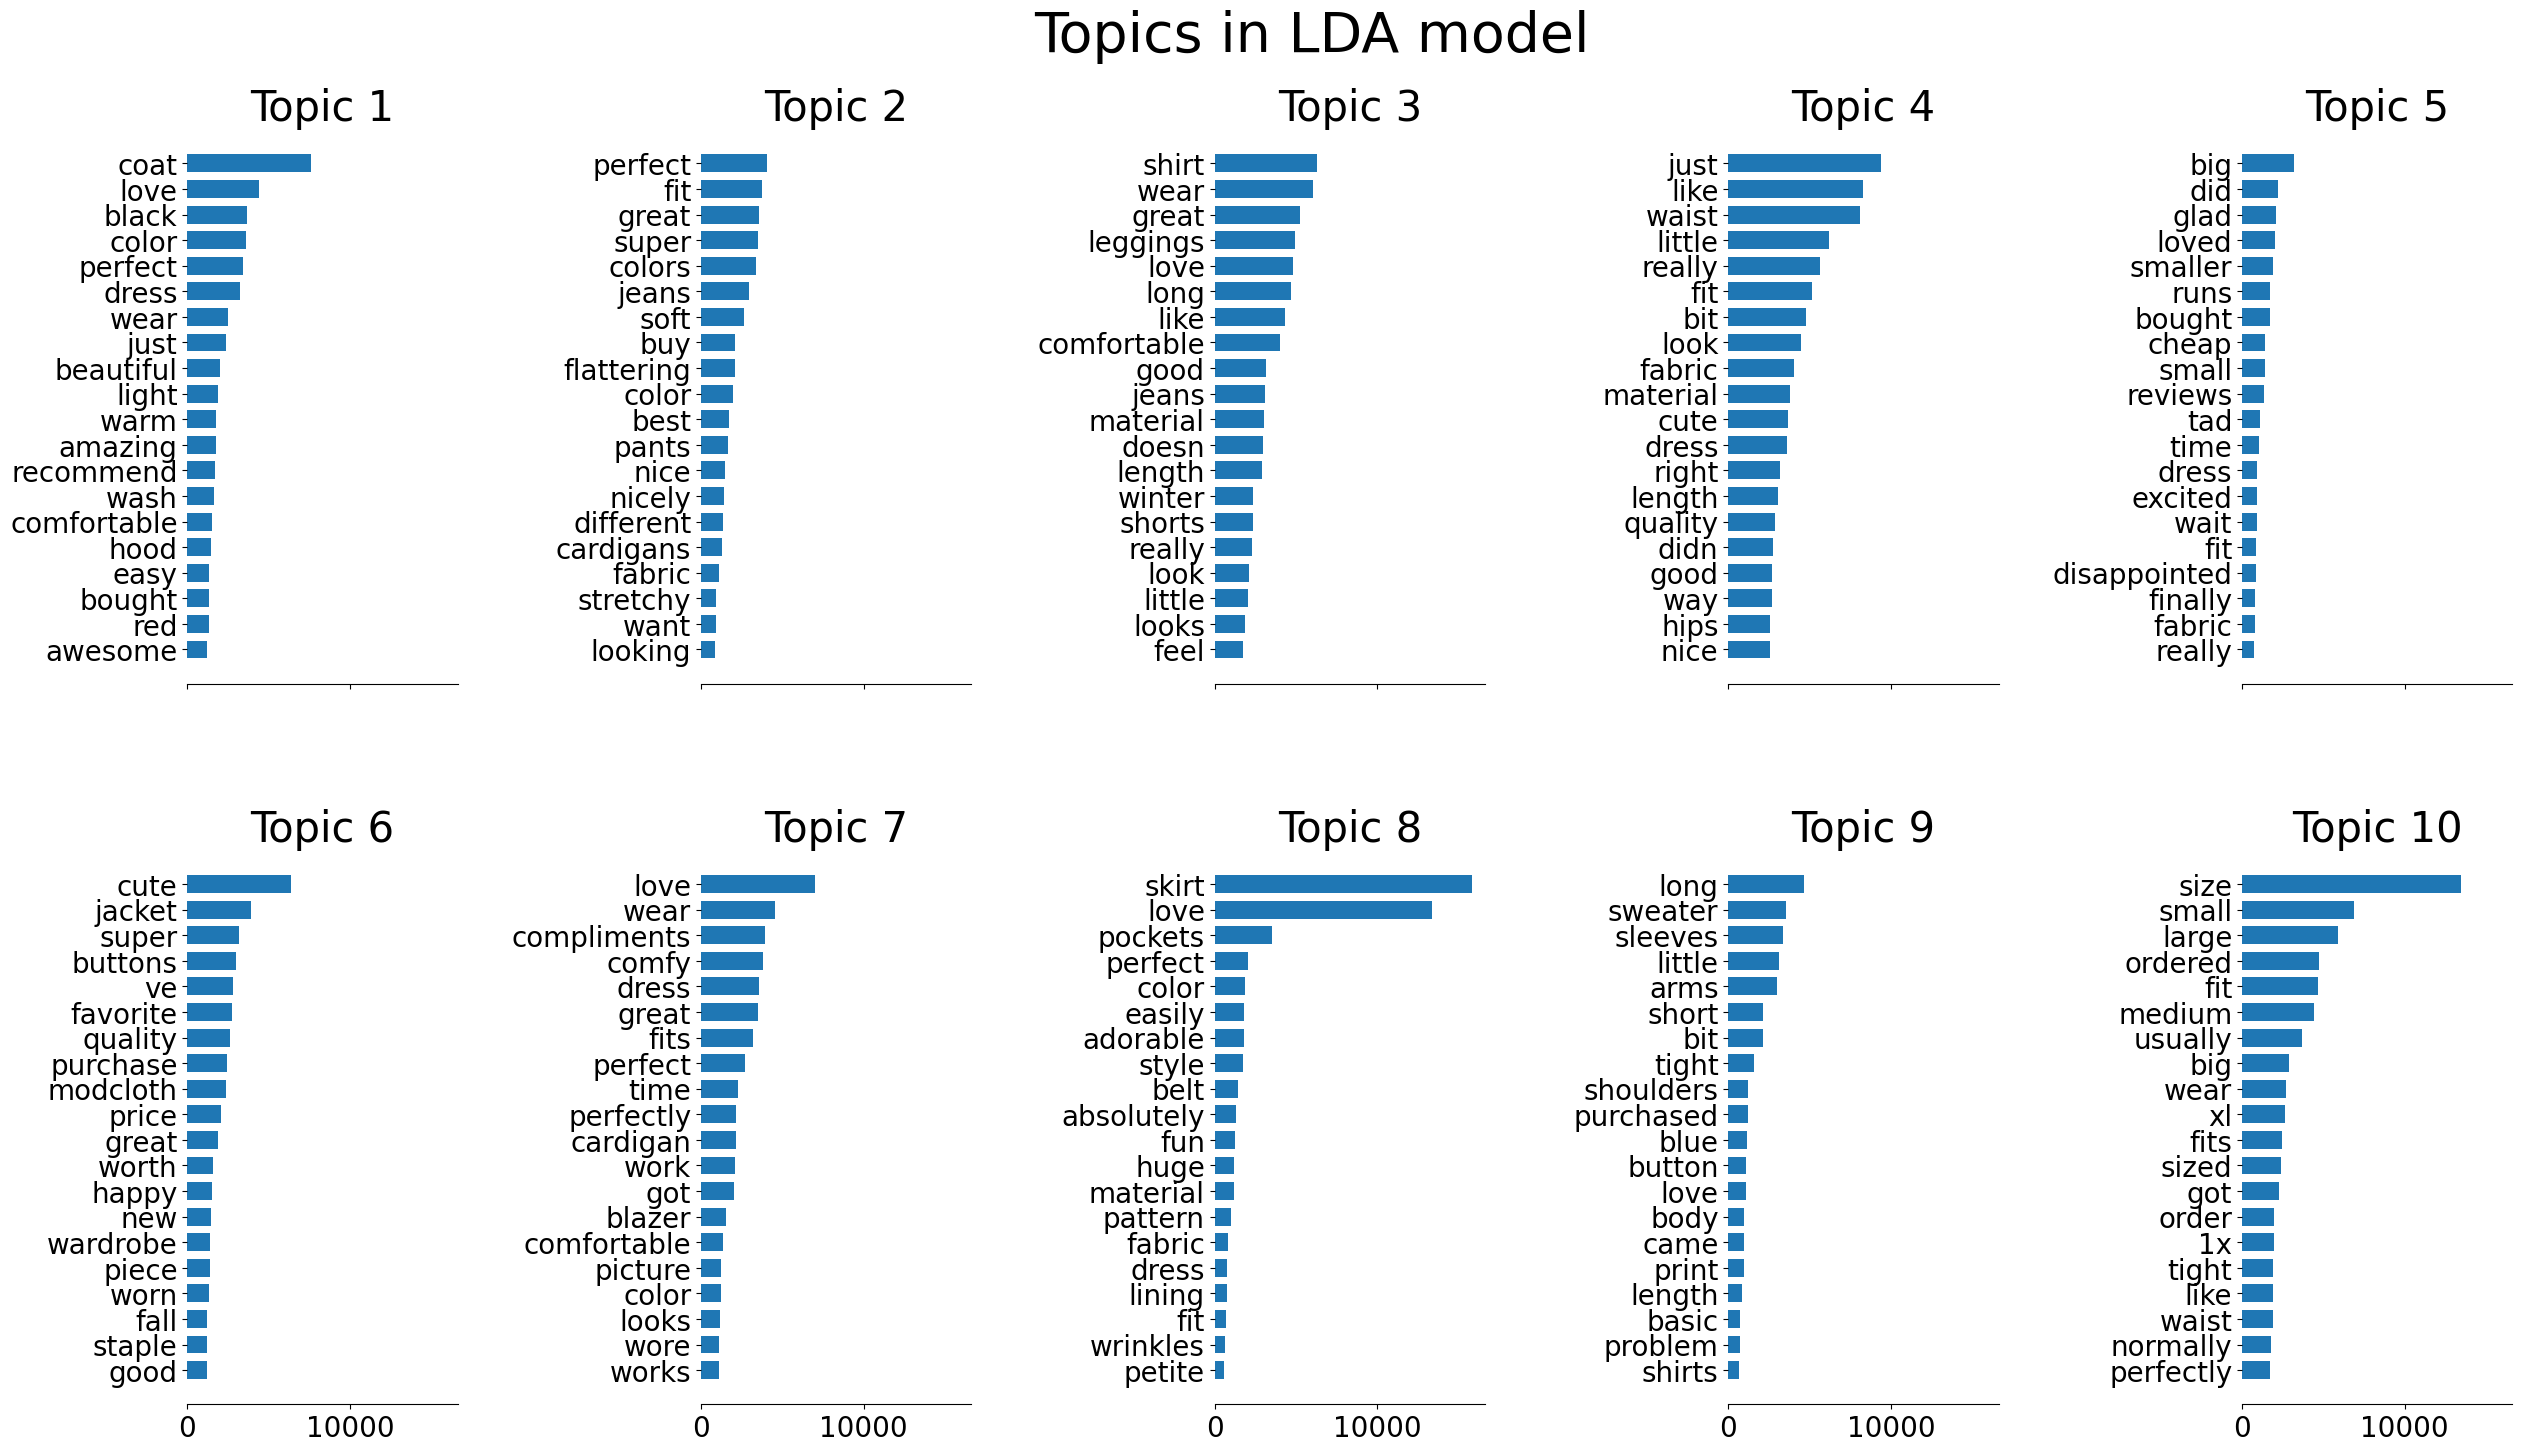

In [42]:
plot_top_words(lda, feat_names, 20, 'Topics in LDA model')

### t-SNE and Manifold Learning

Remove the data points with missing data. You should have 557 remaining data points. 

Use t-SNE (https://scikit-learn.org/stable/modules/manifold.html#t-sne) to embed the data points in a low dimensional space. Look at the guide at https://distill.pub/2016/misread-tsne/ and vary the parameters, including the perplexity. When you have an embedding that looks good, label it using the columns of X, using seaborn’s scatterplot and hue. Plot all the categorical and numerical variables.

In [43]:
no_missing_data = X.dropna()
no_missing_data

,waist,size,hips,bra size,bust,height,shoe size,cup size,category,length,shoe width
1069,30.0,8,40.0,36.0,36.0,67.0,8.5,3.0,2.0,2.0,0.0
1750,27.0,8,34.0,34.0,38.0,59.0,8.0,7.0,2.0,0.0,2.0
1751,33.0,12,36.0,38.0,38.0,63.0,7.5,6.0,2.0,0.0,2.0
2336,49.0,32,51.0,42.0,51.0,66.0,9.5,5.0,2.0,0.0,2.0
2367,31.0,8,41.0,34.0,36.0,66.0,8.5,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
80851,31.0,15,39.0,36.0,39.0,66.0,8.0,6.0,4.0,0.0,2.0
80932,36.0,15,42.0,38.0,44.0,63.0,6.5,4.0,3.0,0.0,2.0
80942,30.0,8,40.0,36.0,35.0,64.0,8.0,3.0,3.0,0.0,2.0
82654,30.0,20,39.0,42.0,32.0,64.0,7.5,2.0,3.0,0.0,2.0


In [44]:
# Use 2 components, 40 for perplexity, 5000 iteration, 10 for the Learning rate, 2 for number of jobs and 42 for random_state. 
# Fit transform the no missing data 
tsne = TSNE(n_components=2, perplexity=40, n_iter=5000, learning_rate=10,n_jobs=2,random_state=42)
tsne_embd = tsne.fit_transform(no_missing_data)

Combine t-SNE data with original `no_missing_data`

In [47]:
tsne_embd_df = pd.DataFrame(tsne_embd, columns=["x","y"])
nmd = no_missing_data.reset_index(drop=True)
tsne_total = pd.concat([nmd,tsne_embd_df], axis=1)
tsne_total

,waist,size,hips,bra size,bust,height,shoe size,cup size,category,length,shoe width,x,y
0,30.0,8,40.0,36.0,36.0,67.0,8.5,3.0,2.0,2.0,0.0,-3.998227,-2.759047
1,27.0,8,34.0,34.0,38.0,59.0,8.0,7.0,2.0,0.0,2.0,-3.129216,14.384377
2,33.0,12,36.0,38.0,38.0,63.0,7.5,6.0,2.0,0.0,2.0,5.158938,10.963655
3,49.0,32,51.0,42.0,51.0,66.0,9.5,5.0,2.0,0.0,2.0,41.623348,-2.257159
4,31.0,8,41.0,34.0,36.0,66.0,8.5,3.0,2.0,0.0,0.0,-3.218252,-3.516577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,31.0,15,39.0,36.0,39.0,66.0,8.0,6.0,4.0,0.0,2.0,7.677709,8.104287
553,36.0,15,42.0,38.0,44.0,63.0,6.5,4.0,3.0,0.0,2.0,24.838974,2.758653
554,30.0,8,40.0,36.0,35.0,64.0,8.0,3.0,3.0,0.0,2.0,-5.379419,2.689766
555,30.0,20,39.0,42.0,32.0,64.0,7.5,2.0,3.0,0.0,2.0,13.432013,1.036711


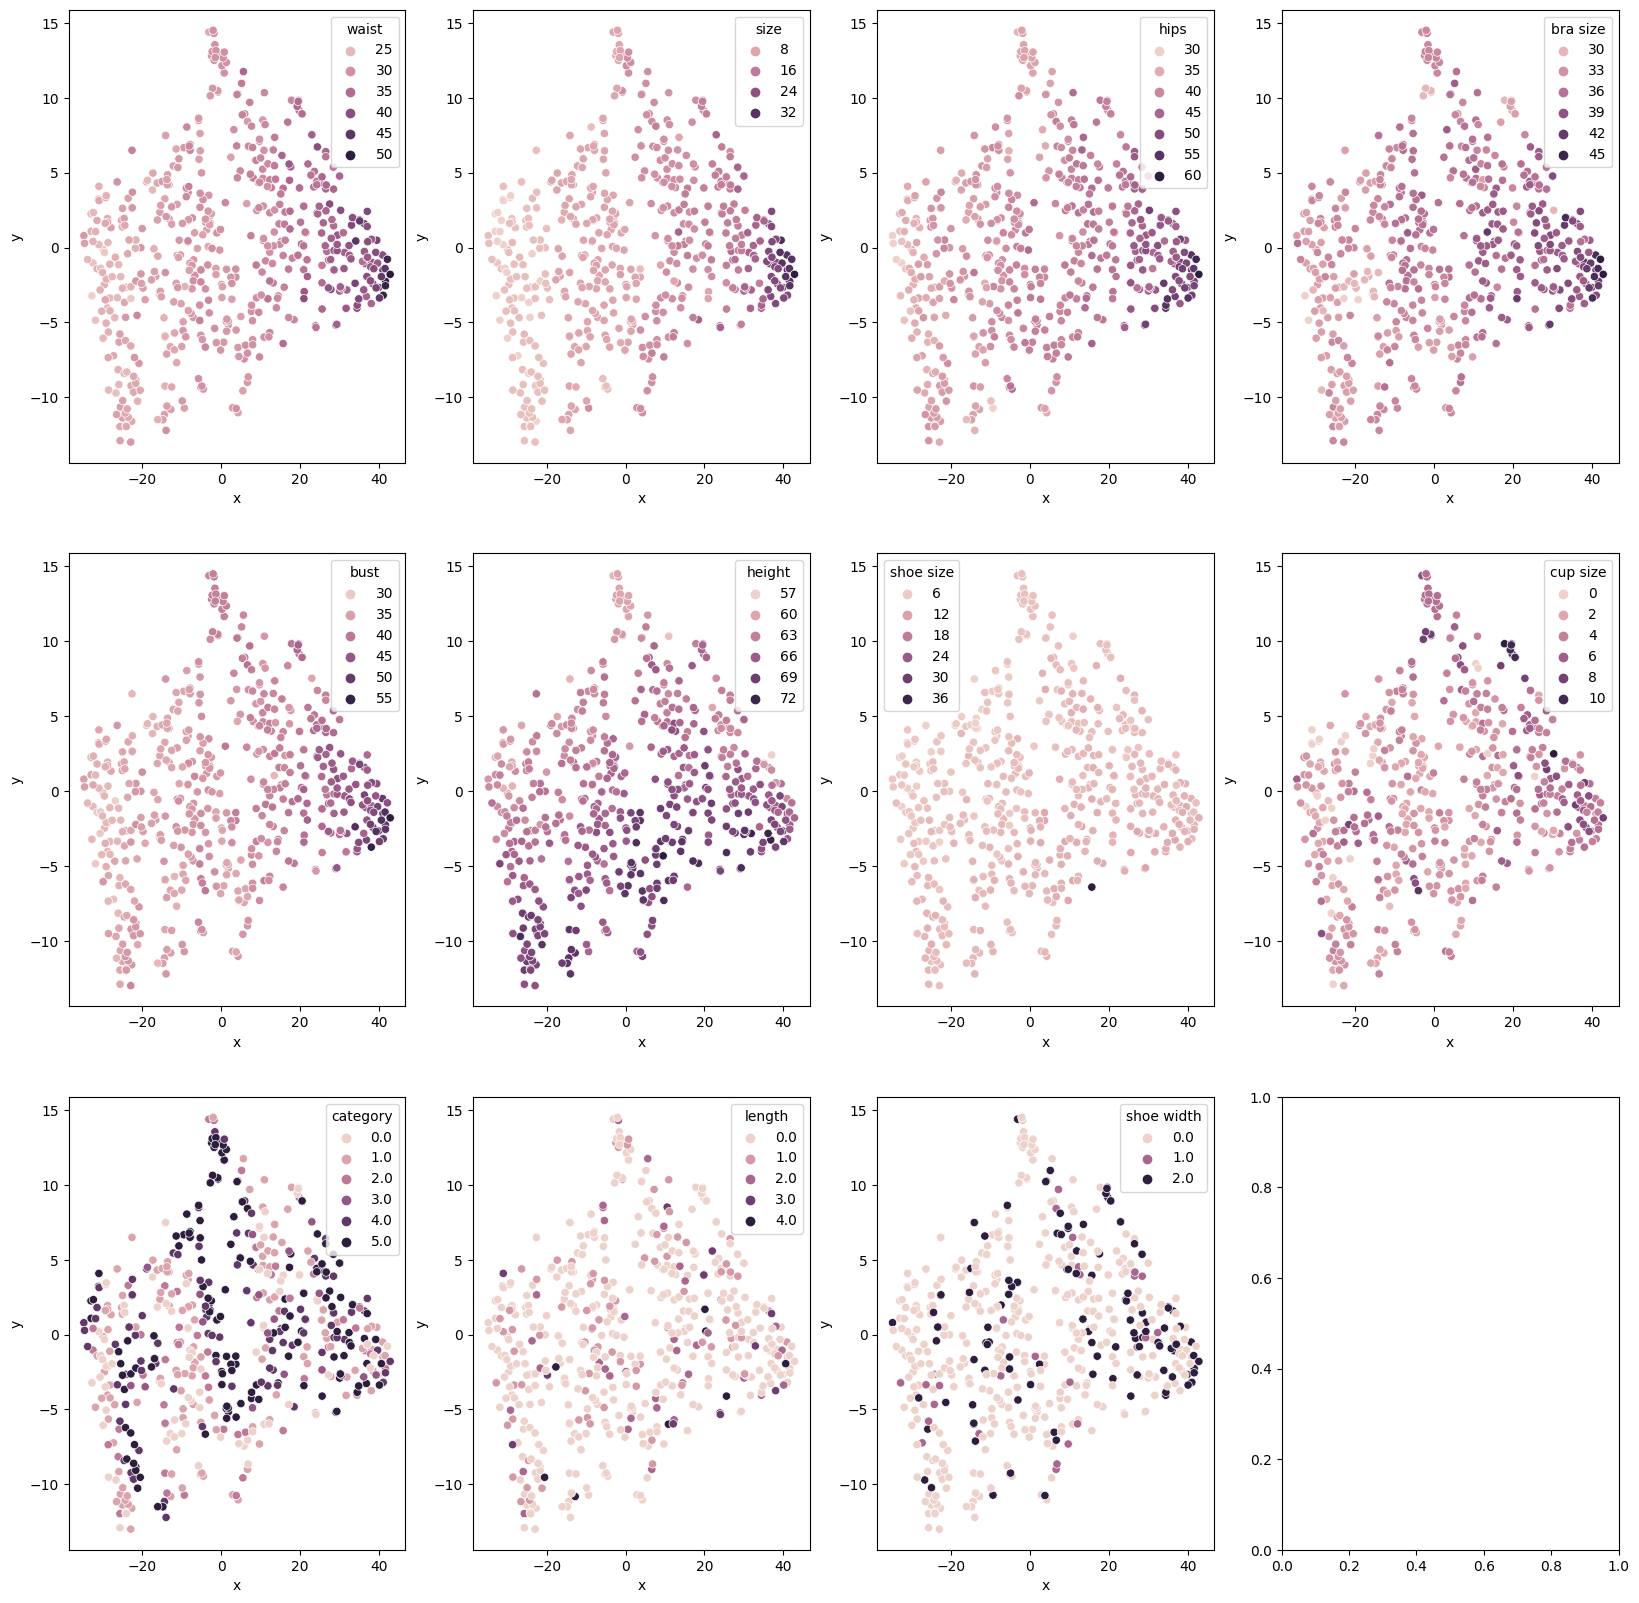

In [48]:
# Plot here:
fig, ax = plt.subplots(3,4, figsize = (20,20))
for i in range(len(no_missing_data.columns)):
  col = no_missing_data.columns[i]
  sns.scatterplot(data=tsne_total, x="x", y="y",hue=tsne_total[col],ax = ax[i // 4, i % 4])
